In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Data Collection

In [2]:
data = pd.read_csv('car_price.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
company = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(2,"CompanyName",company)
data.drop(['CarName'],axis = 1, inplace=True)
data.drop(['car_ID'],axis=1,inplace=True)
data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

# Data Cleaning

In [5]:
#There are mispellings in the data, need to correct them
data.CompanyName.unique()
def rename(old,new):
    data.CompanyName.replace(old,new,inplace=True)

rename('porcshce','porsche')
rename('maxda','mazda')
rename('vw','volkswagen')   
rename('toyouta','toyota')
rename('vokswagen','volkswagen')

data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Exploratory Data Analysis

C:\Users\Pavan Mannem\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


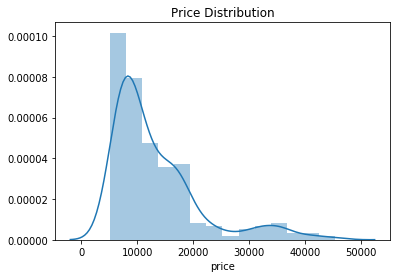

In [6]:
plt.title('Price Distribution')
sns.distplot(data.price)

Text(0.5,1,'Avg Price by Company')

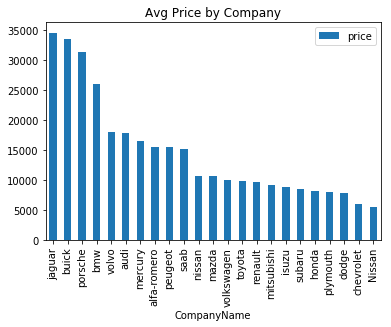

In [7]:
df = pd.DataFrame(data.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Avg Price by Company')

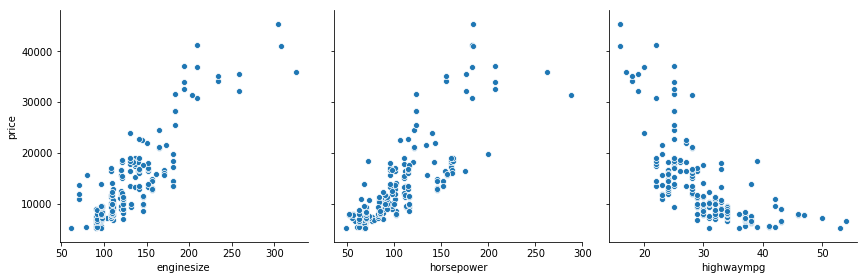

In [8]:
def plot_price(attr1,attr2,attr3):
    sns.pairplot(data, x_vars=[attr1,attr2,attr3], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()
    
plot_price('enginesize', 'horsepower', 'highwaympg')


## We can identify which attributes of the vehicle affect car price. Doing this for all attributes, we make a new dataframe using only highly correlated variables

In [9]:
# Derived property using a common formula for fuel economy
data['fueleconomy'] = (0.55 * data['citympg']) + (0.45 * data['highwaympg'])

car_final = data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth']]
car_final.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4


In [10]:
# In order to input categorical data into the model we need to convert the colums to binary
# To do this we create 'dummies' (eg. binary columns for gas/diesel)
def create_dummies(category,df):
    new_df = pd.get_dummies(df[category], drop_first = True)
    df = pd.concat([df, new_df], axis = 1)
    df.drop([category], axis = 1, inplace = True)
    return df


car_final = create_dummies('fueltype',car_final)
car_final = create_dummies('aspiration',car_final)
car_final = create_dummies('carbody',car_final)
car_final = create_dummies('drivewheel',car_final)
car_final = create_dummies('enginetype',car_final)
car_final = create_dummies('cylindernumber',car_final)

In [23]:
car_final.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


# Modeling

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Splitting data into training and testing
data_train, data_test = train_test_split(car_final, train_size = 0.80, test_size = 0.20)

# Extracting independent variables (car attributes) and dependent variables (price)
y_train = data_train.pop('price')
x_train = data_train

y_test = data_test.pop('price')
x_test = data_test

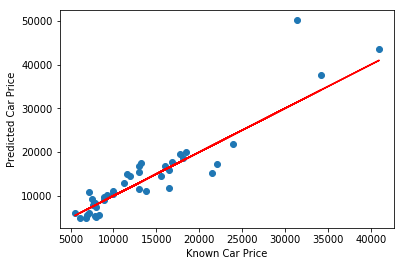

In [51]:
#Applying a multiple linear regression model 
linReg = LinearRegression()
linReg.fit(x_train,y_train)
y_pred = linReg.predict(x_test)

plt.scatter(y_test,y_pred)
plt.xlabel('Known Car Price')
plt.ylabel('Predicted Car Price')
plt.plot(y_test,y_test, c = 'red')